<a href="https://colab.research.google.com/github/easyymm/TIL/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic 생존자 예측**
https://www.kaggle.com/c/titanic/data

Goal: "어떤 특징을 가진 사람이 생존할 가능성이 높은가?"를 예측하는 모델 만들기

# 라이브러리 및 데이터셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and direc

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
# 그래프 스타일 지정
plt.style.use('fivethirtyeight')

In [7]:
train = pd.read_csv('/content/data/MyDrive/titanic/titanic/asset/train.csv')
test = pd.read_csv('/content/data/MyDrive/titanic/titanic/asset/test.csv')
submit = pd.read_csv('/content/data/MyDrive/titanic/titanic/asset/result/submission.csv')

# EDA

**변수 설명**
- PassengerId
- Surived: 0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- Name: 승객 이름
- Sex: male=남성, female=여성
- Age: 나이(1세 미만(영아)이면 소수점으로, 나이가 추정되었으면 xx.5 형태로 표시)
- SibSp: 타이타닉 호에 동승한 형제자매/배우자의 수(정부(mistresses)와 약혼자(fiancés)는 미포함)
- Parch: 타이타닉 호에 동승한 부모/자식의 수(일부 어린이는 유모와 함께 여행했으므로 parch=0으로 표시)
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지: C=셰르부르, Q=퀸즈타운, S=사우샘프턴

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# train.info(verbose=True): 컬럼 생략 없이 모든 컬럼 확인하기
# 타입이 적당하지 않다고 생각되는 컬럼 타입 변경해주는 단계
train.info()
# 결측치 추후 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
train.describe()
# Age min값, Fare max값이 이상치인지 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


<Axes: >

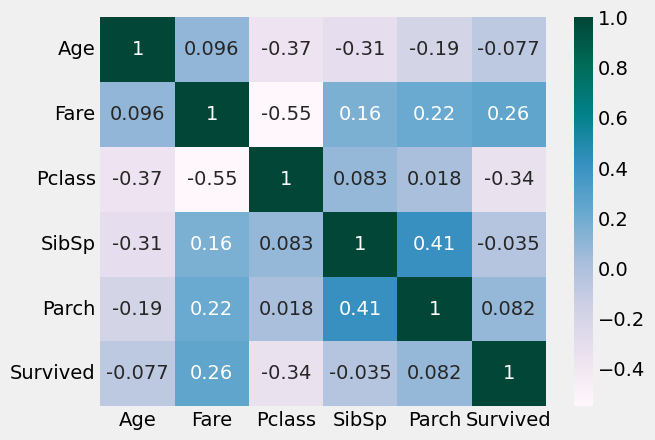

In [14]:
# 수치형 변수 지정하여 히트맵 그리기
sns.heatmap(train[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, cmap='PuBuGn')
# 수치형 변수 간 강한 상관관계는 없어보인다.
# 객실 등급과 요금은 (당연히) 상관관계가 있다.

<Axes: ylabel='count'>

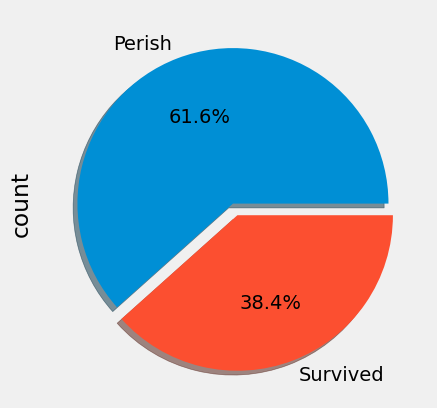

In [15]:
# 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
labels = ['Perish', 'Survived']
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.08], labels=labels)

<Axes: xlabel='Embarked', ylabel='count'>

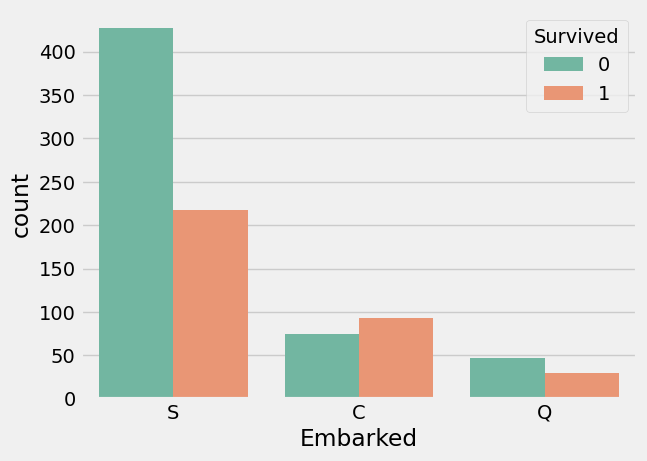

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set2')
# 승선지별 생존자 & 사망자 수

<Axes: xlabel='Embarked', ylabel='Survived'>

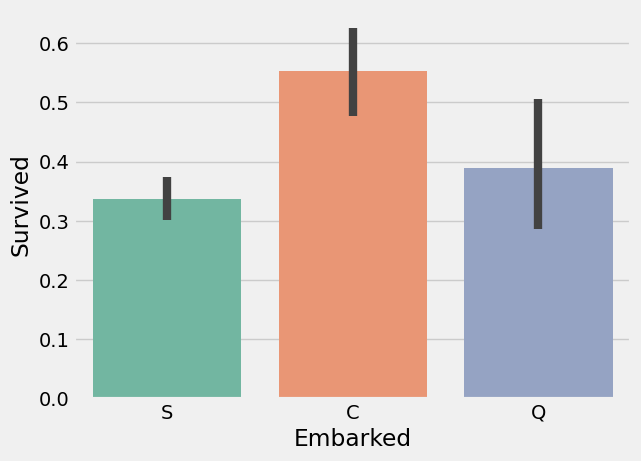

In [17]:
sns.barplot(x='Embarked', y='Survived', data=train, palette='Set2')
# 셰르부르에서 승선한 사람의 생존율이 유의미하게 높다->셰르부르 탑승자의 다른 특징을 살펴보자.

<Axes: xlabel='Embarked', ylabel='Fare'>

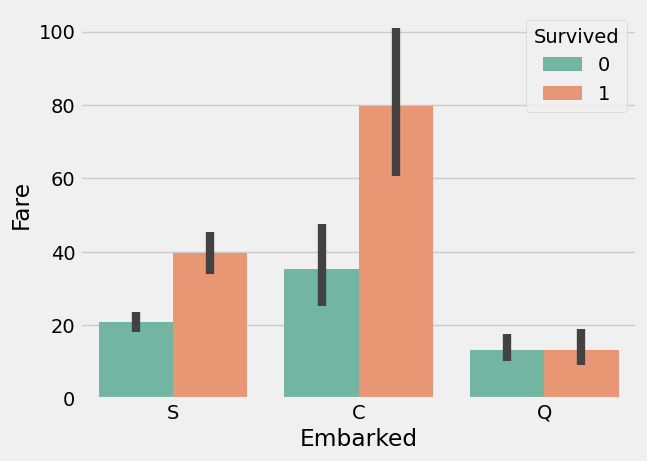

In [18]:
sns.barplot(x='Embarked', y='Fare', hue='Survived', data=train, palette='Set2')
# 셰르부르에서 승선한 사람들의 평균 요금이 높다. -> 해당 도시의 특성?
# 퀸즈타운의 요금이 낮은 건 다른 두 도시에 비해 늦게 승선한 영향도 있지 않을까?

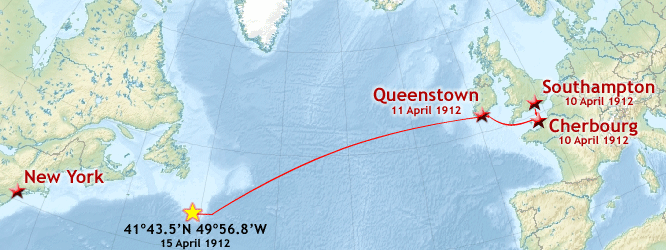

<Axes: xlabel='Embarked', ylabel='count'>

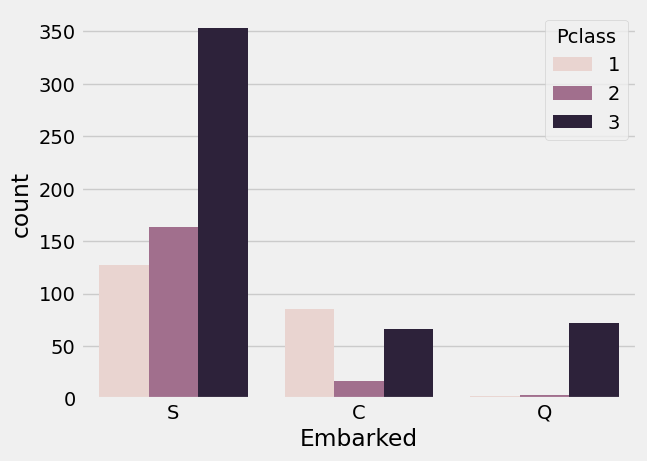

In [19]:
sns.countplot(x='Embarked', hue='Pclass', data=train)
# 사우샘프턴, 퀸즈타운에서는 3등급 객실 고객이 가장 많이, 셰르부르에서는 1등급 객실 고객이 가장 많이 승선

<Axes: xlabel='Pclass', ylabel='count'>

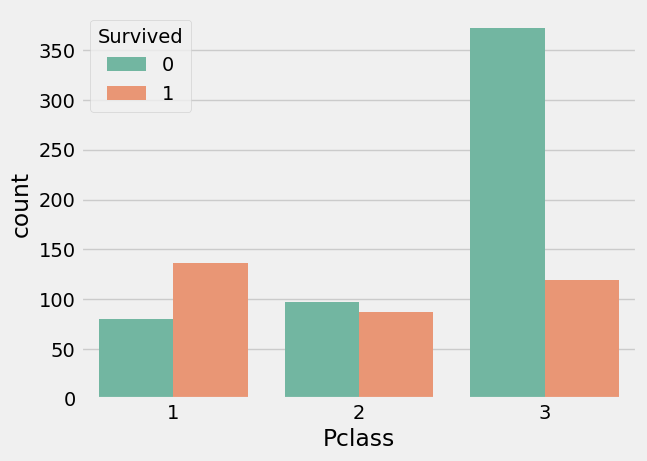

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set2')
# 높은 등급의 객실 고객이 생존율이 높다.

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survived')]

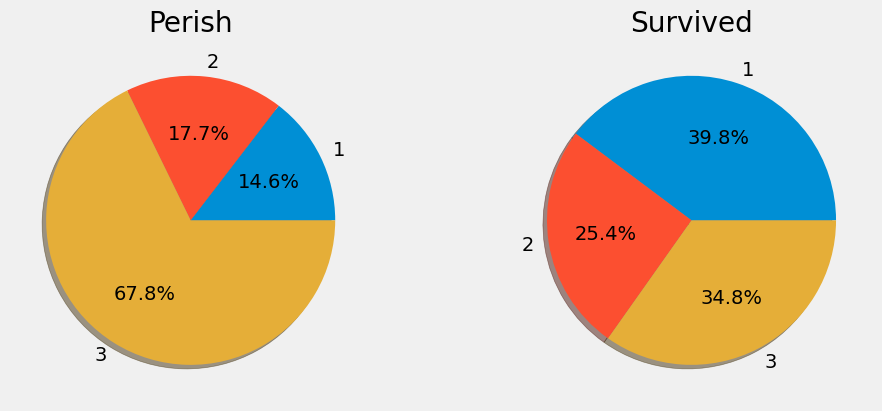

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,4), constrained_layout=True)

#Survived 가 0인 데이터를 이용한 Pie Plot
train[train['Survived'] == 0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(ylabel='', title='Perish')

#Survived 가 1인 데이터를 이용한 Pie Plot
train[train['Survived'] == 1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%')
ax[1].set(ylabel='', title='Survived')

<Axes: xlabel='Sex', ylabel='count'>

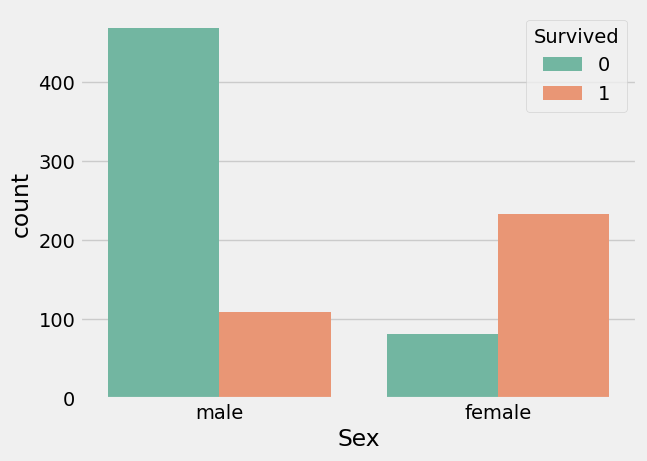

In [22]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set2')
# 남성은 사망자가, 여성은 생존자가 더 많다.

<Axes: xlabel='Pclass', ylabel='Survived'>

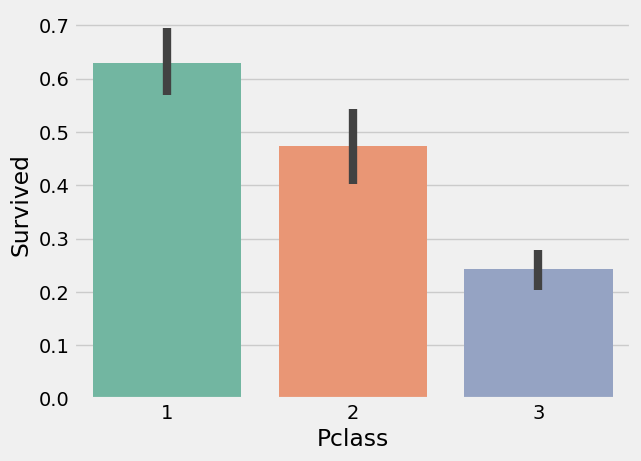

In [23]:
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set2')
# 객실 등급별 생존율

<Axes: xlabel='SibSp', ylabel='Survived'>

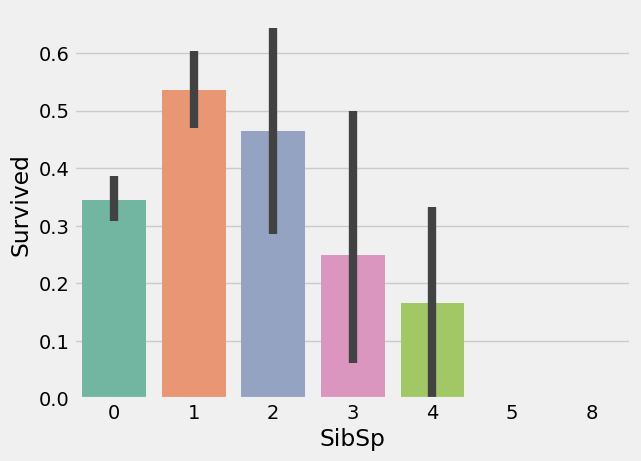

In [24]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='Set2')

In [25]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='Parch', ylabel='Survived'>

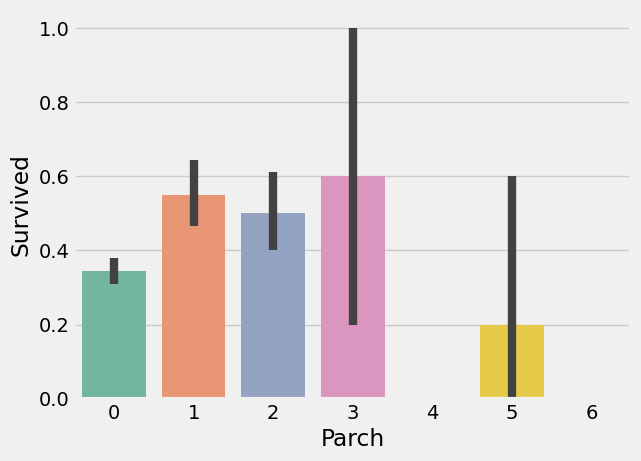

In [26]:
sns.barplot(x='Parch', y='Survived', data=train, palette='Set2')

In [27]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


SibSp와 Parch는 합치는 것이 더 의미 있을 것 같다.

<Axes: xlabel='Age', ylabel='Density'>

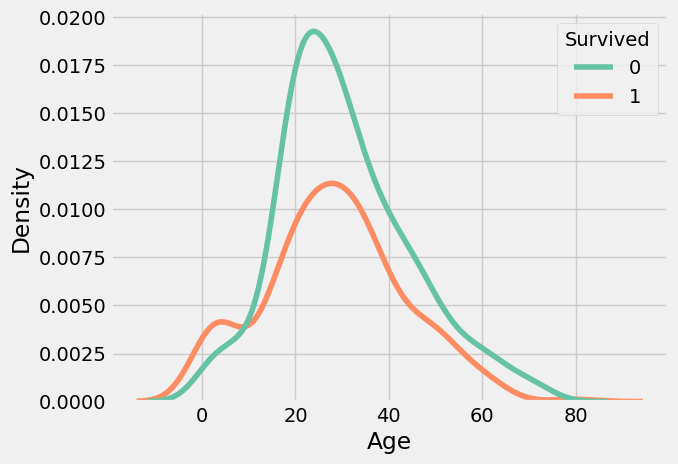

In [28]:
sns.kdeplot(x='Age', data=train, hue='Survived', palette='Set2')

<Axes: xlabel='Fare', ylabel='Density'>

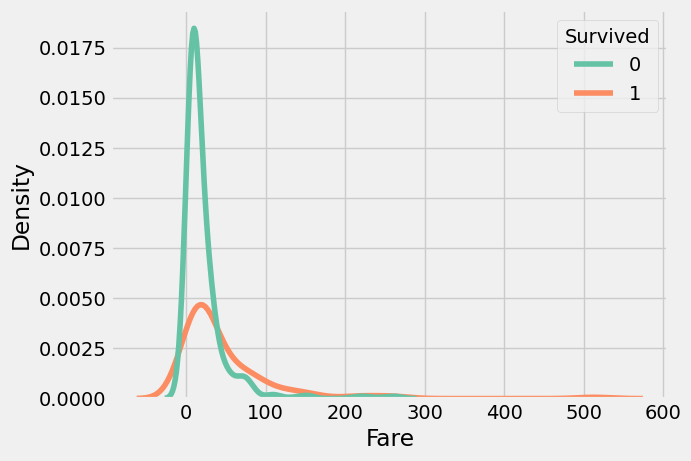

In [29]:
sns.kdeplot(x='Fare', data=train, hue='Survived', palette='Set2')

<Axes: ylabel='Fare'>

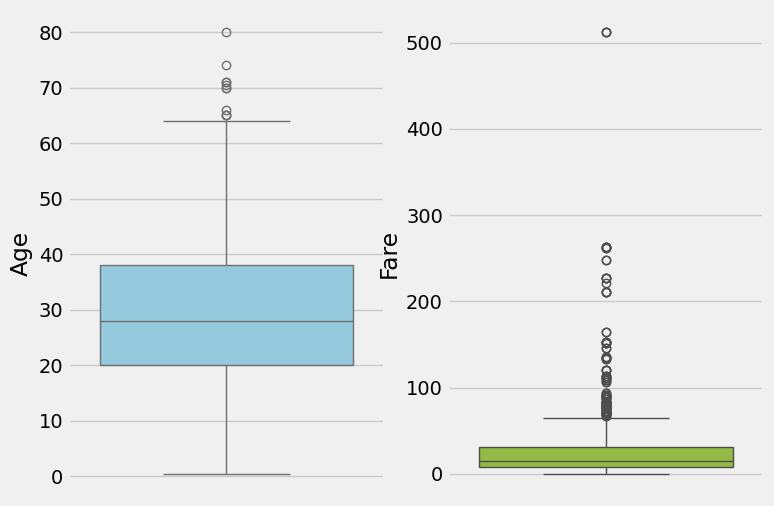

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(ax=axes[0], y=train['Age'], color='skyblue')
sns.boxplot(ax=axes[1], y=train['Fare'], color='yellowgreen')
# 이상치 추후 제거

# 전처리
: EDA 과정을 통해 필요하다고 생각한 전처리 수행  
train data와 test data에는 동일하게 전처리를 적용해야 일관된 모델 학습이 가능하다.

## 결측치 시각화 및 처리
결측치 처리 방법: 제거(Deletion), 대치(Imputation)

- 단순 대치법: 평균, 중앙값, 최빈값 등
- KNN: 인접하는 점들의 값 활용. 이상치에 민감
- 다중 대치법

In [31]:
print(train.isna().sum())
print('---')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

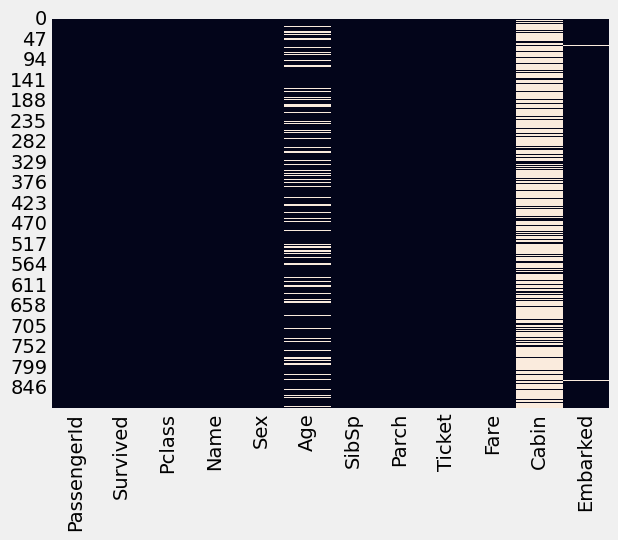

In [32]:
# seaborn 결측치 시각화
sns.heatmap(train.isna(), cbar=False)
# cbar: 히트맵 우측에 표시되는 0~1 사이의 컬러 바

<Axes: >

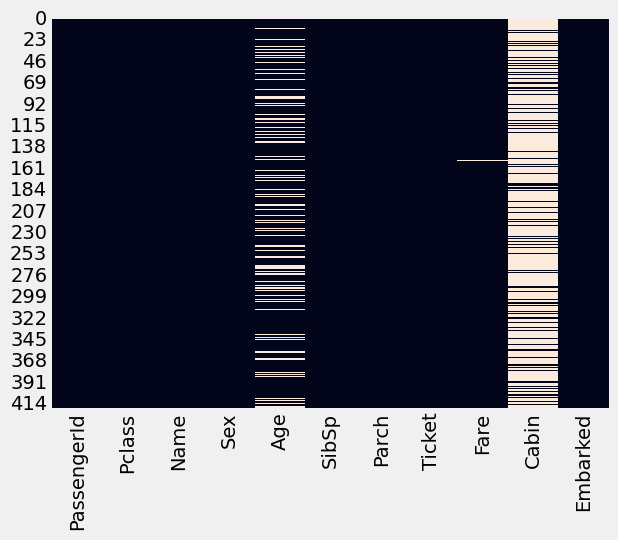

In [33]:
sns.heatmap(test.isna(), cbar=False)

<Axes: >

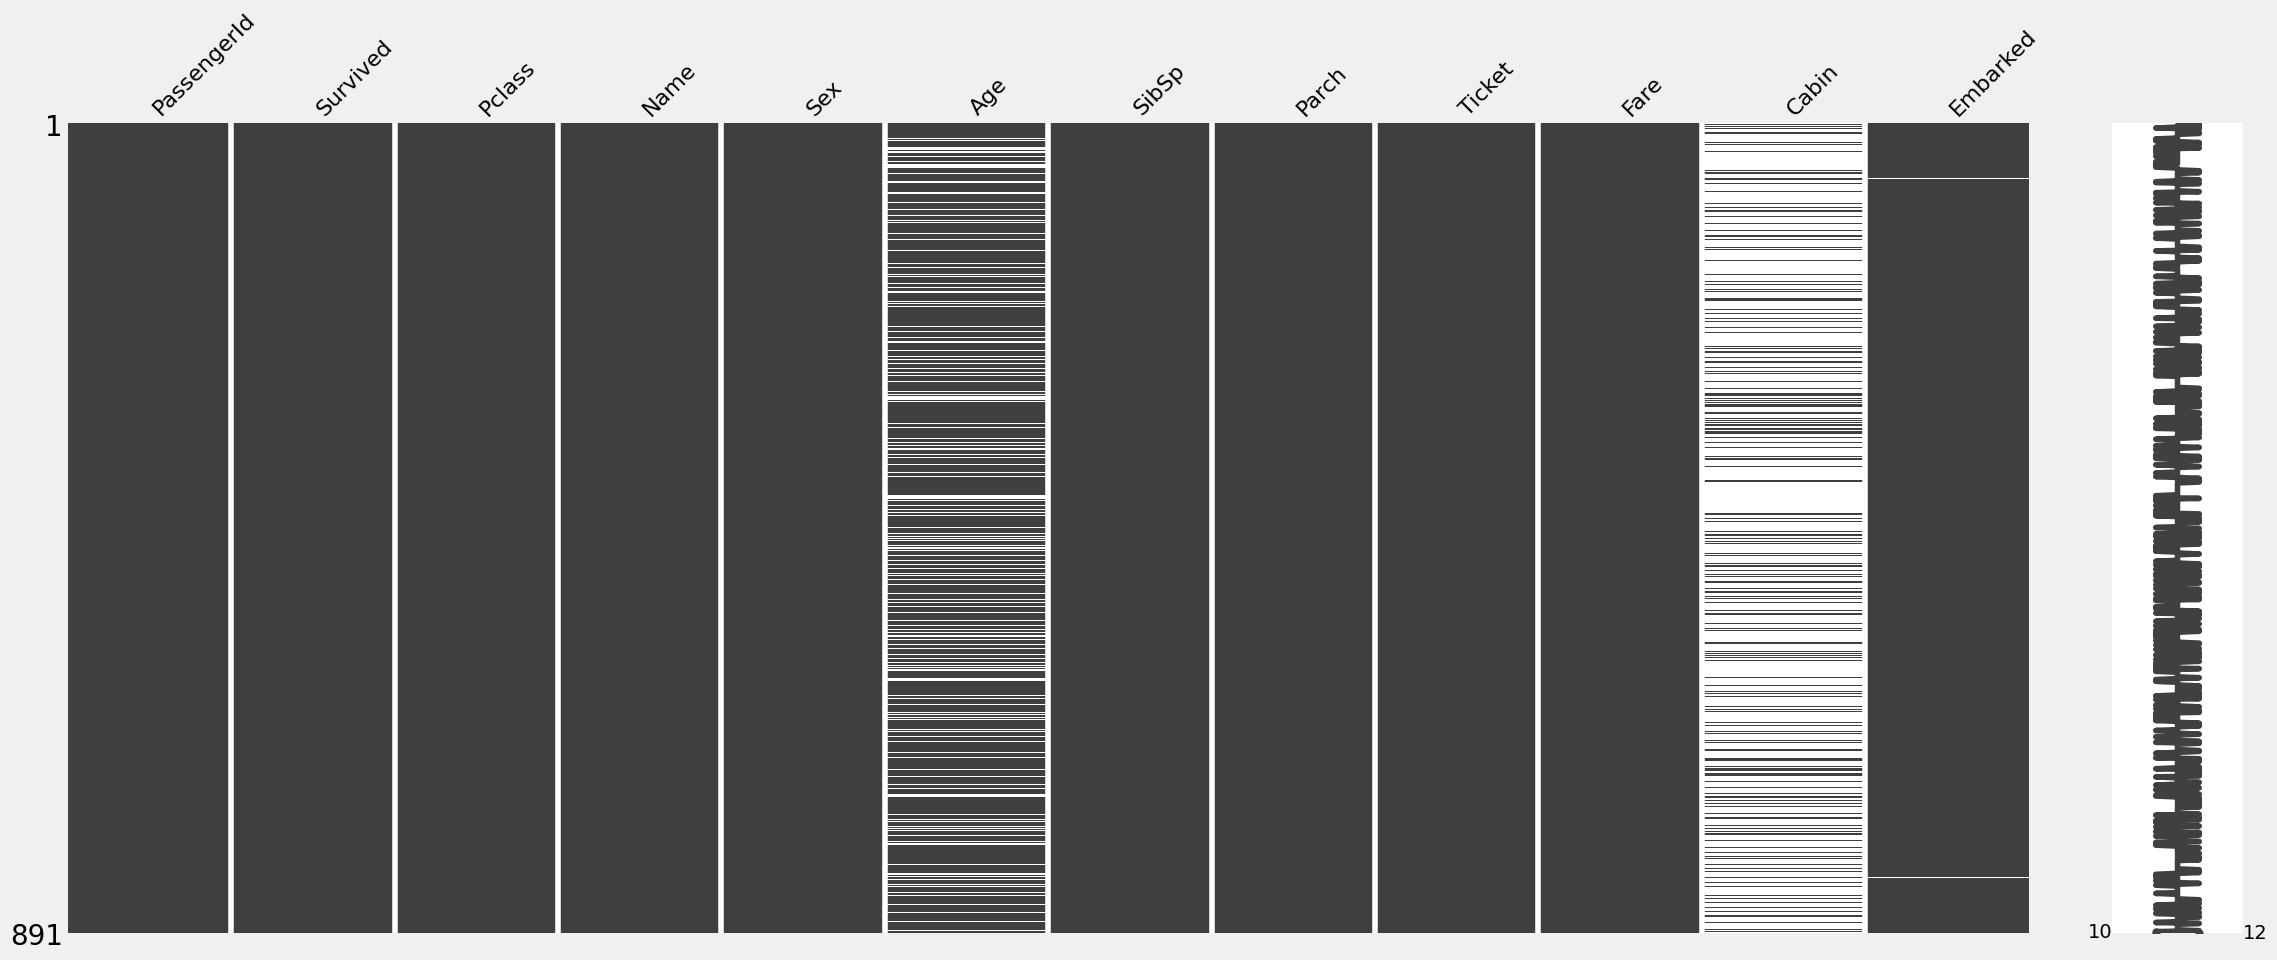

In [34]:
# missingno 모듈로 결측치 시각화하기
# 결측치를 파악하기 쉽게 시각화해주는 라이브러리
import missingno as msno

msno.matrix(train)

<Axes: >

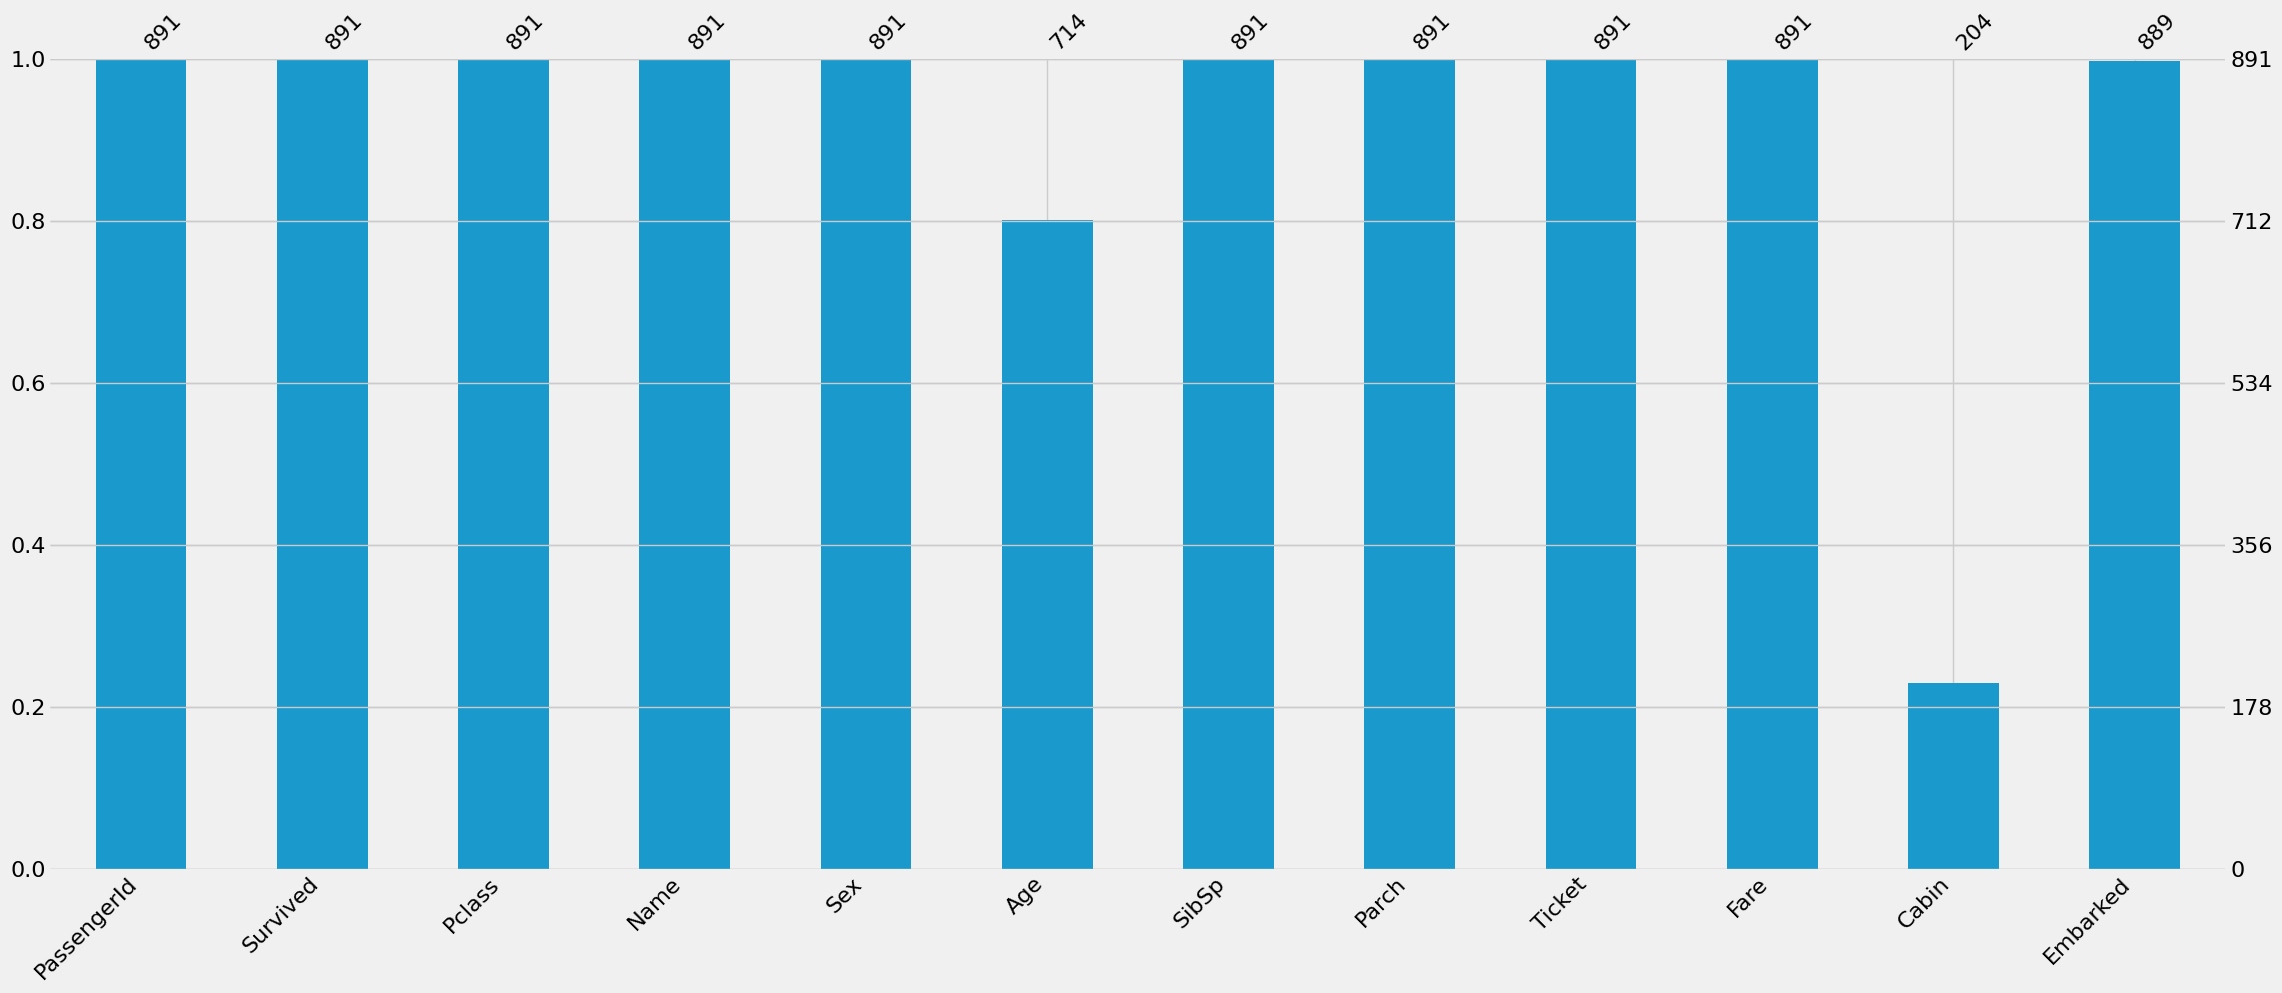

In [35]:
msno.bar(train, color=(0.1, 0.6, 0.8)) # RGB값 지정

- Cabin: 결측값이 너무 많음, 컬럼을 제거하는 것이 나아보임
- Age: 여러 결측값 처리 방법 비교해보기
- Embarked(train): 범주형이므로 mode(최빈값) 사용(또는 드랍 고려)
- Fare(test): 하나임. Pclass를 보고 mean(평균값) 또는 median(중위수) 대체(또는 드랍 고려)


### Cabin 컬럼 제거

In [36]:
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [37]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


### Age 컬럼 결측치 처리

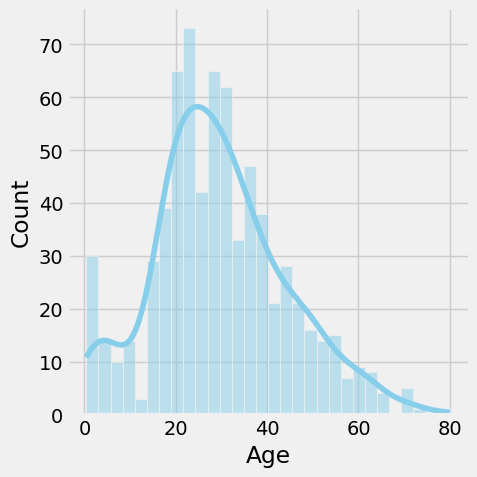

In [38]:
# 결측값 처리 전 age 분포 확인
sns.displot(train['Age'], bins=30, kde=True, color='skyblue')

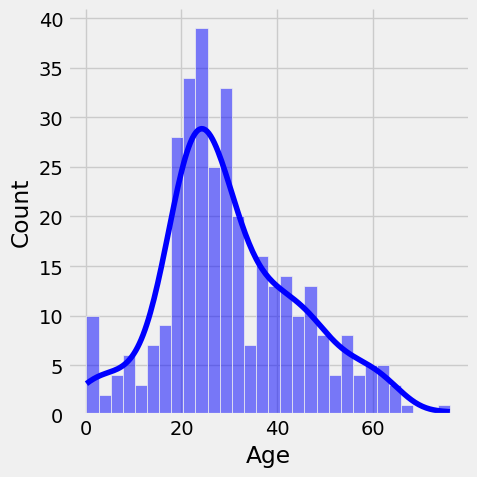

In [39]:
sns.displot(test['Age'], bins=30, kde=True, color='blue')

데이터프레임 복사본을 만들어 결측값 보간

#### 평균값

In [40]:
mean_train = train.copy()
mean_train['Age'].fillna(mean_train['Age'].mean(), inplace=True)
mean_train['Age'].mean()

29.69911764705882

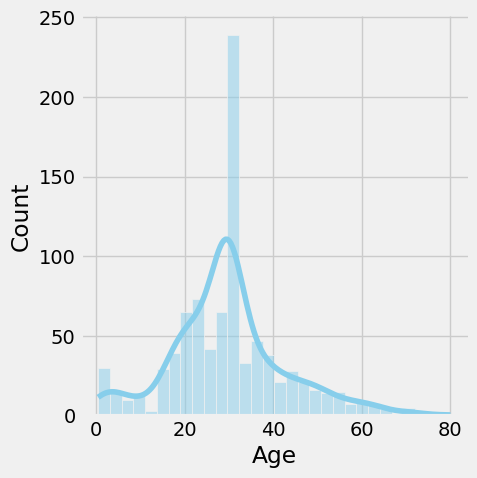

In [41]:
sns.displot(mean_train['Age'], bins=30, kde=True, color='skyblue')

#### 중앙값

In [42]:
median_train = train.copy()
median_train['Age'].fillna(median_train['Age'].median(), inplace=True)
median_train['Age'].median()

28.0

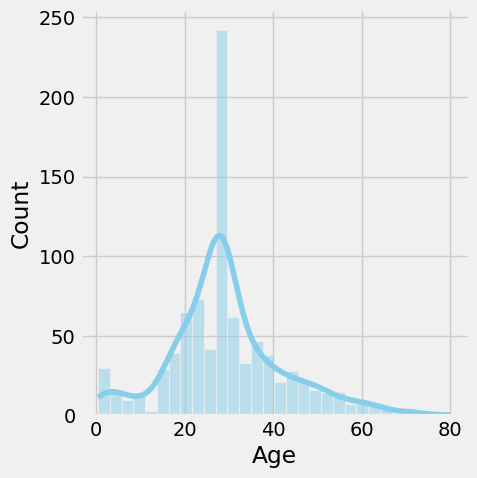

In [43]:
sns.displot(median_train['Age'], bins=30, kde=True, color='skyblue')

#### KNN
- KNNImputer는 결측치 주변의 값 평균으로 결측치를 대체하는 방법
- 연속형 변수에 대해서만 사용할 수 있기 때문에 범주형 변수에 대해 사용하려면 가변수화 과정을 거쳐야 함

In [44]:
from sklearn.impute import KNNImputer

# 범주형 변수->숫자
knn_train = train.copy()
knn_train['Sex'] = knn_train['Sex'].map({'male': 0, 'female': 1})

imputer = KNNImputer(n_neighbors=5)
knn_train[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']] = imputer.fit_transform(knn_train[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex']])

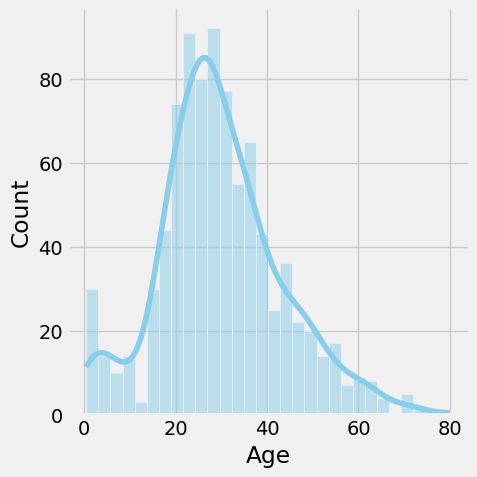

In [45]:
sns.displot(knn_train['Age'], bins=30, kde=True, color='skyblue')

#### MICE(다중대치법)
- Multiveriate Imputation by Chained Equations의 약자로 다중 대치법 중의 하나
- 결측치를 회귀값으로 대체하되 여러 번 대체해 보면서 최상의 값을 찾아내는 알고리즘
- 수치형 변수에만 사용이 가능하고 범주형 변수에 사용하려면 전처리가 필요

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_train = train.copy()

mice_train['Sex'] = mice_train['Sex'].map({'male': 0, 'female': 1})

col_impute = ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

# MICE(IterativeImputer) 적용
imputer = IterativeImputer(random_state=48)
mice_train[col_impute] = imputer.fit_transform(mice_train[col_impute])

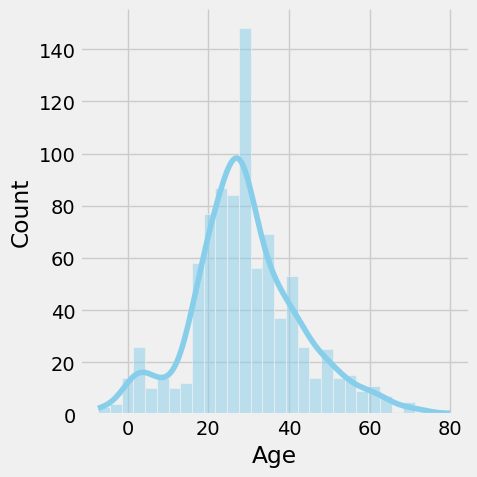

In [47]:
sns.displot(mice_train['Age'], bins=30, kde=True, color='skyblue')

#### 새 피처 Title(<-Name)별 중앙값

In [48]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [49]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# 'Name' 컬럼에서 정규식을 적용해 특정 문자열 추출하기
# 공백+알파벳 대소문자로 된 연속된 문자열+뒤에 온점 있을 때
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


- Miss: 미혼 여성, 여자아이
- Mrs: 기혼 여성
- Mr: 성인 남성
- Master: 남자아이
---
- Lady: 영국 귀족 여성
- Mlle: "Mademoiselle"의 약어, 프랑스 미혼 여성
- Mme: "Madame"의 약어, 프랑스 기혼 여성
- Ms: 여성(기혼 여부와 관계 없음)
- Countess: 백작 부인(귀족 여성)
- Sir: 영국 기사 작위 남성
- Don: 스페인어권 귀족 남성
- Jonkheer: 네덜란드 귀족 남성
- Col: 군사 계급. 대령.
- Major: 군사 계급. 중령.
- Capt: 군사 계급. 대위. 또는 선장.
- Rev: 성직자
- Dr: 의사, 박사

-> 적은 수는 결혼 여부, 직업 또는 지위로 묶기

In [50]:
# 같은 의미의 타이틀 매핑
title_mapping = {
    'Miss': 'Woman', 'Mrs':'Woman', 'Mlle': 'Woman', 'Ms': 'Woman', 'Mme': 'Woman', 'Lady': 'Woman', 'Countess': 'Woman',
    'Sir': 'Mr', 'Don': 'Mr', 'Jonkheer': 'Mr',
    'Col': 'prof', 'Major': 'prof', 'Capt': 'prof',
    'Rev': 'prof', 'Dr': 'prof'
    }
train['Title'] = train['Title'].replace(title_mapping)
test['Title'] = test['Title'].replace(title_mapping)

In [51]:
set(test['Title'].unique()) - set(train['Title'].unique())
# 이렇게 train에는 없지만 test에는 있는 Title이 있을 수 있다.->test 데이터는 모른다고 가정, 미리 매핑 불가.
# 따라서 '기타' 타이틀을 하나 만들어야 한다.

{'Dona'}

In [52]:
valid_titles = set(train['Title'].unique())

train['Title'] = train['Title'].apply(lambda x: x if x in valid_titles else 'Other')
test['Title'] = test['Title'].apply(lambda x: x if x in valid_titles else 'Other')

In [53]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())
# test data의 'Dona'가 'Other'로 잘 매핑된 것을 확인할 수 있다.

Title
Mr        520
Woman     313
Master     40
prof       18
Name: count, dtype: int64
Title
Mr        240
Woman     151
Master     21
prof        5
Other       1
Name: count, dtype: int64


In [54]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Mr,0,520
Woman,313,0
prof,1,17


<Axes: xlabel='Title', ylabel='count'>

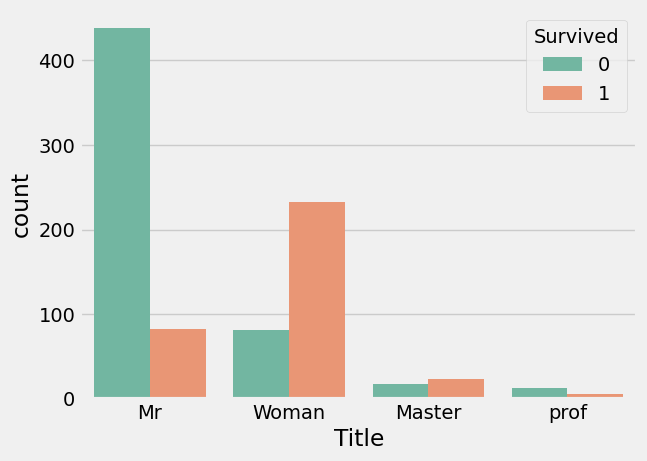

In [55]:
sns.countplot(x='Title', hue='Survived', data=train, palette='Set2')

In [56]:
# 타이틀별로 나이 결측치 중앙값으로 보간
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

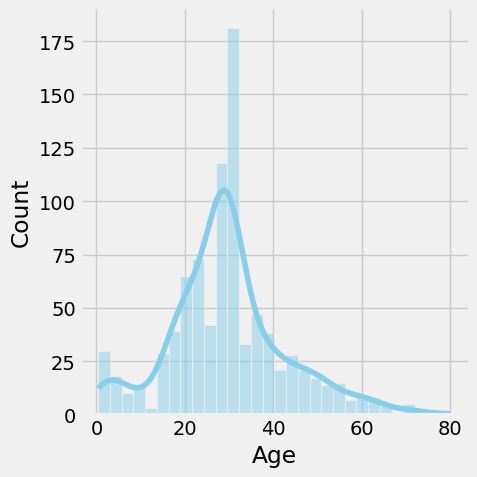

In [57]:
sns.displot(train['Age'], bins=30, kde=True, color='skyblue')

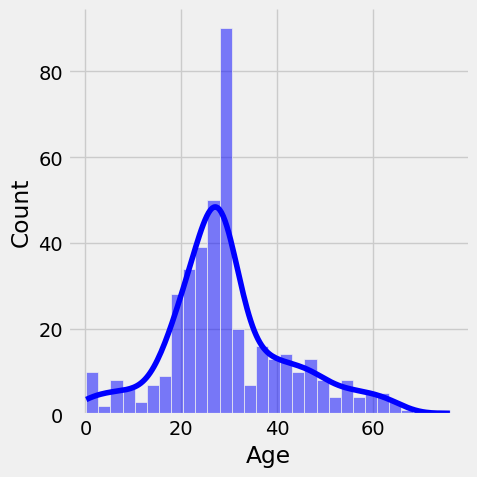

In [58]:
sns.displot(test['Age'], bins=30, kde=True, color='blue')

### Embarked 결측치 처리
범주형 변수, mode로 보간  
(수가 적어 단순 제거도 가능)

In [59]:
# Embarked가 결측치인 2개 행 출력
train.loc[train['Embarked'].isnull() == True, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Woman
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Woman


In [60]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

### Fare 결측치 처리

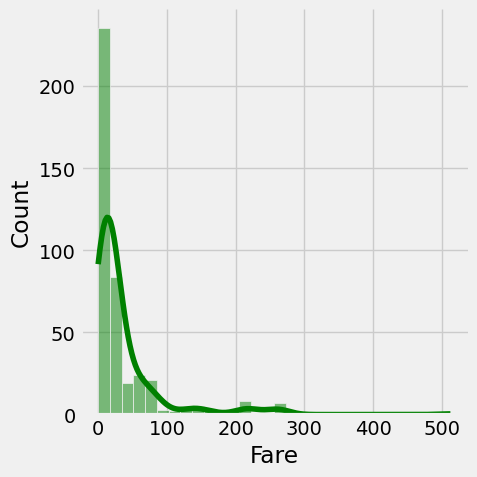

In [61]:
sns.displot(test['Fare'], bins=30, kde=True, color='green')

In [62]:
# Fare가 결측치인 행 출력
test.loc[test['Fare'].isnull() == True, :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


등급별로 요금 차이가 크지 않을까?  
->차이 뚜렷하게 있음, Pclass 기준으로 Fare 보간

<Axes: xlabel='Pclass', ylabel='Fare'>

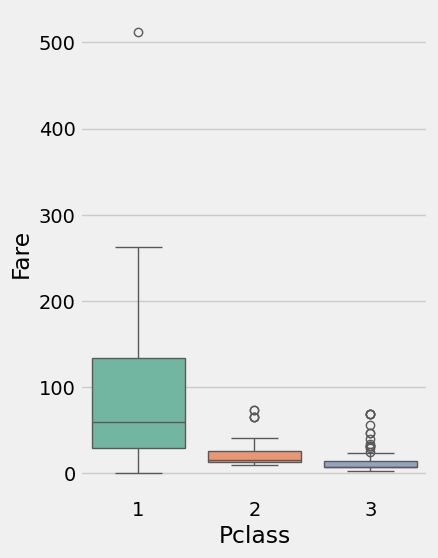

In [63]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Pclass', y='Fare', data=test, palette = 'Set2')

In [64]:
# 결측치를 해당 등급의 평균값으로 보간
test['Fare'] = test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

결측치 처리가 완료되었는지 확인하기.

In [65]:
print(train.isna().sum())
print('---')
print(test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64
---
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


## 이상치 처리

In [66]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.483917,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.152945,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.612440,0.447368,0.392344,35.571764
std,120.810458,0.841838,12.863184,0.896760,0.981429,55.851997
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Age 이상치 처리

In [68]:
print(train['Age'].unique())
print('---')
print(train['Age'].value_counts().sort_index(ascending=False))

[22.   38.   26.   35.   30.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.    3.5  17.
 32.   16.   25.    0.83 33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
---
Age
80.00    1
74.00    1
71.00    2
70.50    1
70.00    2
        ..
0.92     1
0.83     2
0.75     2
0.67     1
0.42     1
Name: count, Length: 89, dtype: int64


나이가 소수점인 값들이 꽤 있음

-> 나이가 추정되었다면 .5 형식으로 표시되었다고 함.  
-> 1살보다 어리면, 소수(0.xx)로 표현함.

In [69]:
train[train['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,Woman
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Woman
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S,Master
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,Master
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,Master


title을 보면, male은 모두 Master인 것을 알 수 있음(=어린 아이), 따로 처리하지 않고 그대로 두기로 함.

### Fare 이상치 처리

1. Z-점수(Z-score)  
- 평균값을 기반으로 이상치를 탐지하는 방법
- 각 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 나타내는 표준 점수를 계산
- Z-점수가 3을 초과하면 이상치로 간주
- 데이터가 정규분포일 때 효과적

2. IQR(Interquartile Range)  
- 사분위수 기반으로 이상치를 탐지하는 방법
- Q1(25%)와 Q3(75%)의 차이를 IQR이라고 하며, Q1 – 1.5 * IQR 미만이나 Q3 + 1.5 * IQR 초과하는 데이터를 이상치로 판단
- boxplot을 사용하면 쉽게 확인할 수 있음
- 정규분포가 아닌 경우에도 사용 가능(이상치에 강함)

=> 큰 이상치가 있으므로 IQR로 제거

#### Z-score

In [70]:
z_train = train.copy()

from scipy import stats

z_scores = stats.zscore(z_train['Fare'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3

z_train = z_train[abs_z_scores <= age_threshold]

In [71]:
z_train.shape

(871, 12)

In [72]:
z_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.447956,0.517796,0.366246,26.530170
std,257.761917,0.484806,0.821469,13.177691,1.101448,0.792325,29.351184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,13.862500
75%,665.500000,1.000000,3.000000,35.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


#### IQR

In [73]:
Q1 = train["Fare"].quantile(0.25)
Q3 = train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  7.9104
Q3:  31.0
IQR:  23.0896


In [74]:
# train 이상치 제거
train = train[(train['Fare'] >= Q1 - 1.5 * IQR) & (train['Fare'] <= Q3 + 1.5 * IQR)]

# test 이상치 변환
test["Fare"] = np.clip(test["Fare"], lower_bound, upper_bound)

train과 test 데이터가 나누어져 있는 경우, train에서 이상치를 제거한 후 학습하더라도 test에서는 이상치를 제거하지 않아야 함.

-> lower bound보다 작은 값은 lower bound, upper bound보다 큰 값은 upper bound로 변환

<Axes: xlabel='Fare'>

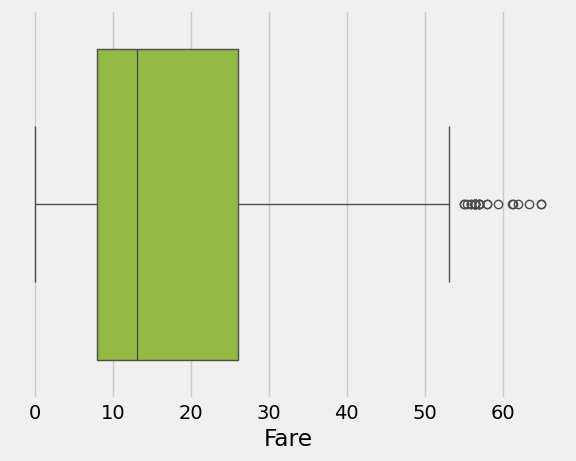

In [75]:
sns.boxplot(x='Fare', data=train, color='yellowgreen')

<Axes: xlabel='Fare'>

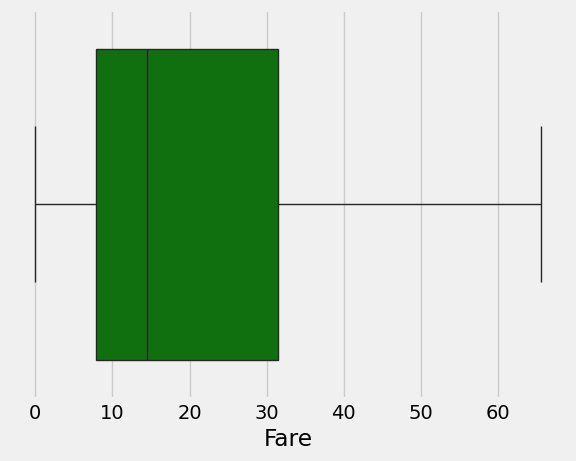

In [76]:
sns.boxplot(x='Fare', data=test, color='green')

## 왜도 처리: Fare
데이터의 분포가 치우쳐 있을 때.
1. 로그 변환: 큰 수를 작은 수로 변환함으로써 계산 용이,
왜도와 첨도를 줄임으로써 분석에서 더 정확한 값을 얻을 수 있음. 왜도가 클 때(극단적인 값이 많을 때) 사용.
데이터 값 간 간격이 클 경우 좁혀줌.
2. 루트(제곱근) 변환: 치우친 분포 정규화.
변수간 비선형 상관성을 선형 상관성으로 변환,
선형 회귀에서 잔차의 이분산성 감소,
데이터의 특정 부분을 시각화하는 데 집중. 왜도가 적당할 때 사용.
3. Box-Cox 변환: 데이터가 양수일 때 사용되며, 데이터를 어떤 지수로 제곱하는 방법으로 변환. λ 값이 0일 경우 로그 변환, 1인 경우는 원래 데이터 이용과 같음. 모델링을 위한 최적의 정규성을 찾고자 할 때 사용.

현재 Fare가 한쪽으로 치우쳐 있으므로 처리 필요.

‼️**개별 변수**의 왜도가 심하면 **왜도 처리**, **전체 데이터**의 스케일링을 표준 정규 분포 형태로 맞추고 싶다면 **스케일링**‼️  
정규 분포를 따르지 않고 왜도가 크면 왜도 처리 / 값 크기 차이가 크면 스케일링. 필요에 따라 둘 다 적용하기도, 생략하기도 함.

### 로그 변환
데이터 중 0이 있다면 전체에 1을 더한 후 로그 변환을 사용해야 한다. (np.log1p)

In [77]:
train_log = train.copy()
train_log['Fare'] = np.log1p(train_log['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

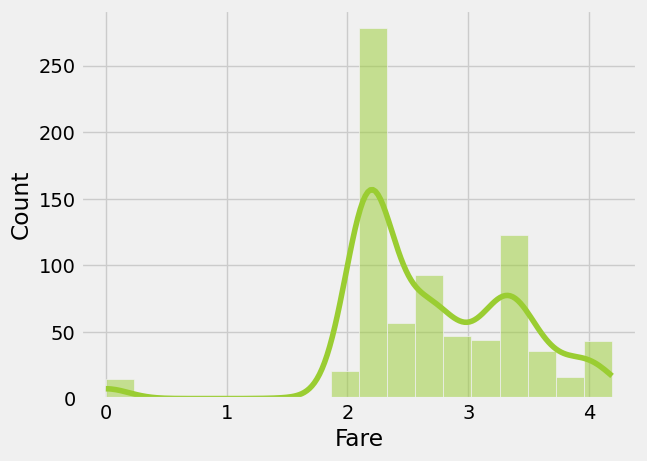

In [78]:
sns.histplot(train_log['Fare'], kde=True, color="yellowgreen")

In [79]:
from scipy.stats import skew

skew(train_log['Fare'])

-0.513794334993771

### 제곱근 변환

In [80]:
train_sqrt = train.copy()
train_sqrt['Fare'] = np.sqrt(train_sqrt['Fare'])

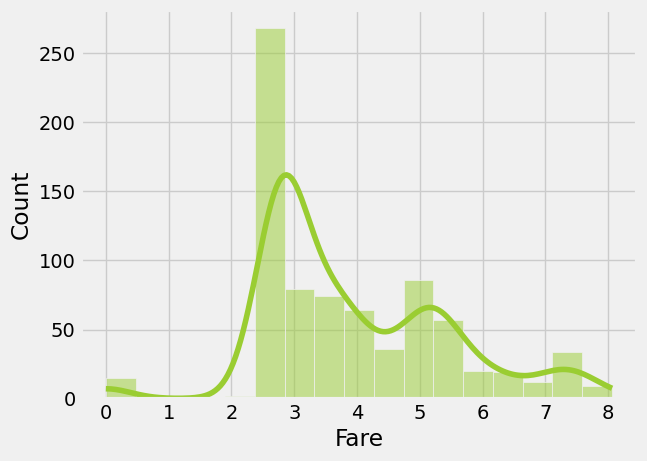

In [81]:
sns.histplot(train_sqrt['Fare'], kde=True, color="yellowgreen")
plt.show()

In [82]:
skew(train_sqrt['Fare'])

0.5756618692280274

### Box-Cox 변환

In [83]:
from scipy import stats

train['Fare'], best_lambda = stats.boxcox(train['Fare'] + 1)
test['Fare'], best_lambda = stats.boxcox(test['Fare'] + 1)

print(best_lambda)

-0.1093668523301739


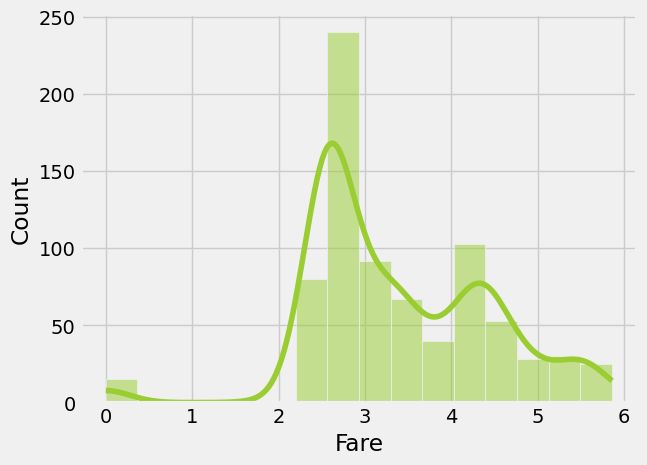

In [84]:
sns.histplot(train['Fare'], kde=True, color="yellowgreen")
plt.show()

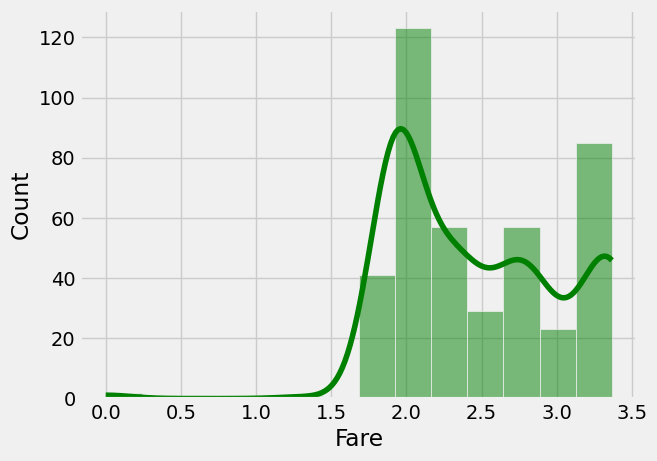

In [85]:
sns.histplot(test['Fare'], kde=True, color="green")
plt.show()

In [86]:
print(skew(train['Fare']))
print(skew(test['Fare']))

0.03321048442702723
0.0007588912563873815


## 범주형 변수 인코딩

모델링을 진행할 때 범주형 변수를 그대로 넣으면 모델이 인식하지 못하고 에러를 발생시킴  
-> 모델에 넣을 수 있는 형식으로 인코딩하는 과정 필요.
- Label Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값을 각각 0 ~ n-1 의 연속적 수치 데이터로 변환시켜주는 방법.
- One-Hot Encoding  
한 컬럼(변수) 내에 존재할 수 있는 n개의 특성값들을 각각 n개의 비트 벡터로 표현하는 방식을 사용하여 범주형 변수 인코딩. True/False

인코딩할 범주형 변수는 'Pclass', 'Embarked', 'Sex'이다.
- Pclass: 등급을 나타내는, 순서형 데이터이므로 Label Encoding을 하는 것이 적합해보인다.
- Sex: 이진변수(Binary)이므로 Label Encoding 해도 문제 없다.
- Embarked, Title: 순서가 없는 명목형 데이터이므로 원핫인코딩을 사용하는 것이 적합해보인다.(여기서는 더미변수로 만들어주었다.)
    * 더미화: 첫 번째 범주를 제거하여 다중공선성 피하는 방식.

#### Label Encoding: Pclass, Sex

In [87]:
from sklearn.preprocessing import LabelEncoder

le_pclass = LabelEncoder()
train['Pclass'] = le_pclass.fit_transform(train['Pclass'])
test['Pclass'] = le_pclass.transform(test['Pclass'])

le_sex = LabelEncoder()
train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.transform(test['Sex'])

#### One-Hot Encoding: Embarked, Title

In [88]:
train = pd.get_dummies(train, columns=['Embarked', 'Title'], drop_first=False)
test = pd.get_dummies(test, columns=['Embarked', 'Title'], drop_first=False)

train = train.drop(columns=['Embarked_C', 'Title_Mr'])
test = test.drop(columns=['Embarked_C', 'Title_Mr'])

In [89]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Woman', 'Title_prof'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Other', 'Title_Woman', 'Title_prof'],
      dtype='object')


In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Master,Title_Woman,Title_prof
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.488384,False,True,False,False,False
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.597457,False,True,False,True,False
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,5.490148,False,True,False,True,False
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.616883,False,True,False,False,False
5,6,0,2,"Moran, Mr. James",1,30.0,0,0,330877,2.678790,True,False,False,False,False


## 파생변수 생성: 일행 수
- 일행 수
    - Family  
    가족 구성원 수: SibSp+Parch+1(본인)->생존 가능성과의 연관성을 더 찾을 수 있을 것이라고 판단.
    - Group  
    Family가 반영하지 못하는 정부, 약혼자, 연인, 유모, 친구 등의 일행을 반영하고자 함. 티켓 번호가 같은 사람을 하나의 일행으로 간주.
    - Total Group  
    Family와 Group 중 큰 값을 적용

In [91]:
train['Ticket'].value_counts(ascending=False)
# 681개의 행.

,count
Ticket,
1601,7
347082,7
3101295,6
CA 2144,6
347088,6
...,...
2693,1
PC 17612,1
349233,1


In [92]:
# Family: 가족 구성원 수=형제/자매/배우자+부모/자녀+본인
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

# Group: 티켓 번호 기반 일행 수 계산(본인 포함)
train['Group'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Group'] = test.groupby('Ticket')['Ticket'].transform('count')

# Total Group: Group, Family 중 max값
train['Total_Group'] = train[['Group', 'Family']].max(axis=1)
test['Total_Group'] = test[['Group', 'Family']].max(axis=1)

## 피처 선택

### 다중공선성 확인(VIF)
- VIF: Variance Inflation Factor.  
- VIF 값이 높으면, 해당 변수와 다른 변수 간 강한 상관관계가 있음=다중공선성 문제가 있음.  
- 일반적으로 VIF>5면 주의를 요하며 VIF>10이면 다중공선성 문제가 있다고 판단한다.

#### 파생변수 미포함 VIF

In [93]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_vars = ['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch']
dummy_vars = ['Embarked_Q', 'Embarked_S']

In [94]:
X_numeric = train[numeric_vars]
X_categorical = train[dummy_vars]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  62.299469
1      Pclass   1.959940
2         Age   1.325863
3        Fare   2.264478
4         Sex   1.138296
5       SibSp   1.625697
6       Parch   1.462771
7  Embarked_Q   1.612870
8  Embarked_S   1.531728


#### 파생변수 포함 VIF

In [95]:
numeric_vars1 = ['Pclass', 'Age', 'Fare', 'Total_Group']
dummy_vars1 = ['Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

In [96]:
X_numeric = train[numeric_vars1]
X_categorical = train[dummy_vars1]
X = pd.concat([X_numeric, X_categorical], axis=1)

X = sm.add_constant(X)

X = X.astype(float)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       Variable        VIF
0         const  59.218580
1        Pclass   2.098254
2           Age   1.529449
3          Fare   2.448665
4   Total_Group   2.073662
5    Embarked_Q   1.606859
6    Embarked_S   1.536275
7  Title_Master   1.510591
8   Title_Woman   1.226504
9    Title_prof   1.058518


성별과 타이틀이 거의 같은 정보를 담고 있으므로, 성별도 드랍한다.

### 피처 중요도(Feature Importance) 확인
트리 기반 모델로 피처 중요도 계산 시 스케일링 전에 진행해도 문제 없음.

#### 파생변수 미포함

In [97]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features1 = ['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']

X = train[selected_features1]
y = train['Survived']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train1, y_train1)

feature_importances1 = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model1.feature_importances_})
feature_importances1 = feature_importances1.sort_values(by='Importance', ascending=False)

<Axes: xlabel='Importance', ylabel='Feature'>

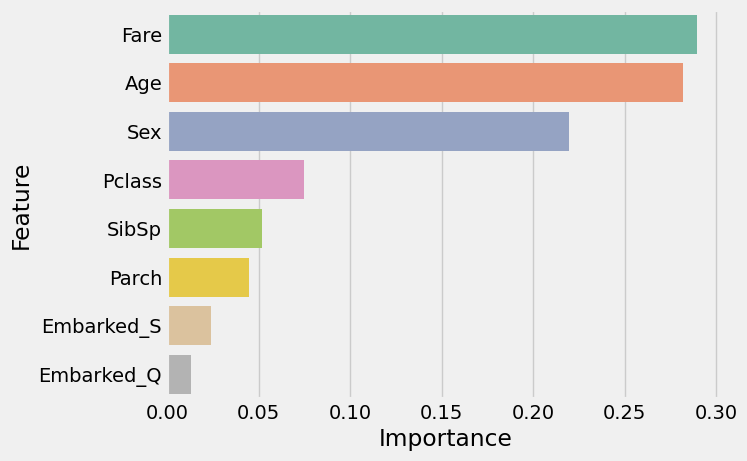

In [98]:
sns.barplot(x='Importance', y='Feature', data=feature_importances1, palette='Set2')

#### 파생변수 포함

In [99]:
# Random Forest

selected_features2 = ['Pclass', 'Age', 'Fare', 'Total_Group', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Woman', 'Title_prof']

X = train[selected_features2]
y = train['Survived']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

feature_importances2 = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model2.feature_importances_})
feature_importances2 = feature_importances2.sort_values(by='Importance', ascending=False)

In [100]:
feature_importances2
# Military, prof는 중요도 거의 없음, 합치는 게 나을 듯

,Feature,Importance
2,Fare,0.273527
1,Age,0.267363
7,Title_Woman,0.230734
3,Total_Group,0.087276
0,Pclass,0.076804
5,Embarked_S,0.024035
6,Title_Master,0.019799
4,Embarked_Q,0.013923
8,Title_prof,0.006540


<Axes: xlabel='Importance', ylabel='Feature'>

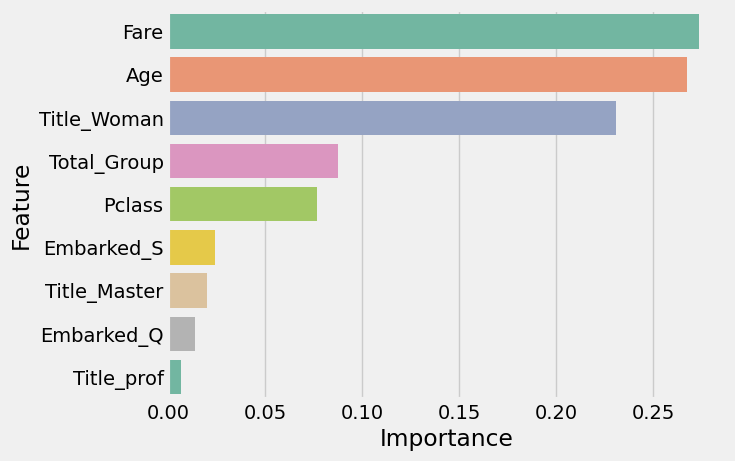

In [101]:
sns.barplot(x='Importance', y='Feature', data=feature_importances2, palette='Set2')

In [102]:
from sklearn.metrics import accuracy_score

y_pred1 = rf_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)

y_pred2 = rf_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

print("미포함 모델 정확도:", accuracy1)
print("포함 모델 정확도:", accuracy2)

미포함 모델 정확도: 0.7483870967741936
포함 모델 정확도: 0.7612903225806451


### 피처 제거
사용하지 않을 피처는 제거한다.

In [103]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Family', 'Group'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Family', 'Group'], axis=1)

In [104]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Woman', 'Title_prof', 'Total_Group'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Other', 'Title_Woman', 'Title_prof',
       'Total_Group'],
      dtype='object')


## 스케일링
스케일링이 필요한 경우: 변수가 각각 다른 단위 및 범위를 가질 때, 회귀 모형이나 머신러닝 기법 등에서 문제를 일으키는 것을 방지하기 위함. 왜도와 첨도를 줄여 정규성 높아짐.

<스케일링 종류>  
1) StandardScaler: 평균을 제거하고 단위 분산으로 조정. 평균을 0, 분산을 1로 스케일링. 이상치가 큰 데이터에는 취약하기에 이상치 제거 후 스케일링해야 함.  
2) MinMaxScaler: 각 특성이 0과 1 사이에 위치하도록 스케일링함. 극단적 이상치 값에 매우 취약하기에 이상치 제거 후 스케일링해야 함.  
3) MaxAbsScaler: 절댓값이 0과 1 사이에 위치하도록 스케일링함. (-1~1) 모든 데이터가 양수인 경우 MinMax와 동일. 이상치에 민감.  
4) Robust Scaler: 평균과 분산 대신 사분위수를 사용함. 중앙값과 IQR을 사용하므로 이상치 영향 최소화.  
5) Normalizer: 컬럼이 아닌 열 기준으로 열마다 정규화를 진행. 한 행의 모든 변수 사이의 유클리드 거리가 1이 되도록. 학습 속도 빠르고 과적합 확률 적어짐.  

=> 사용 알고리즘에 따라 적합한 방식 다름.

### Standard Scaler

In [105]:
from sklearn.preprocessing import StandardScaler

train_st = train.copy()

scaler = StandardScaler()
train_st[['Age', 'Fare']] = scaler.fit_transform(train_st[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

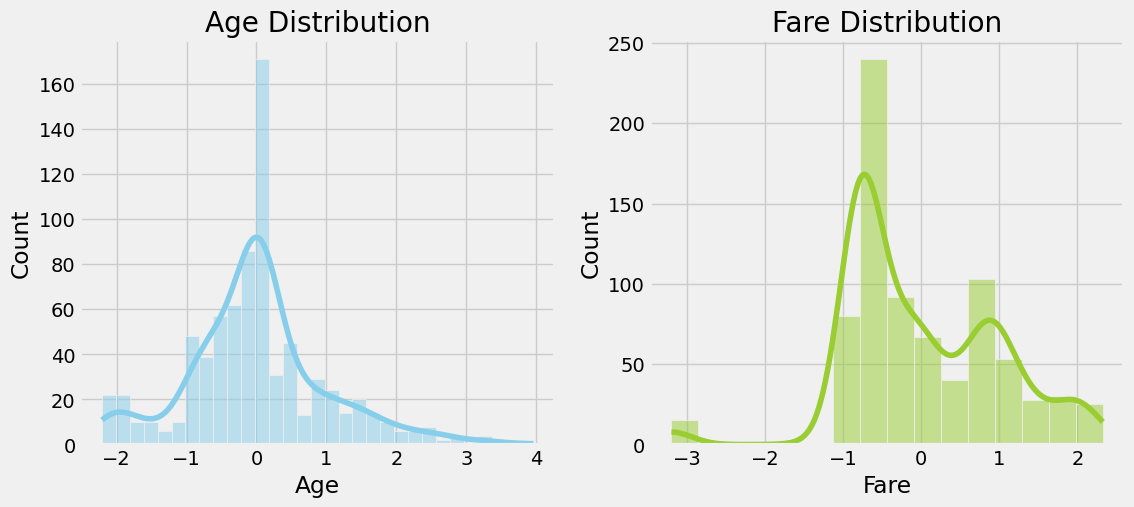

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_st['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_st['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### MinMaxScaler

In [107]:
from sklearn.preprocessing import MinMaxScaler

train_minmax = train.copy()

scaler = MinMaxScaler()
train_minmax[['Age', 'Fare']] = scaler.fit_transform(train_minmax[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

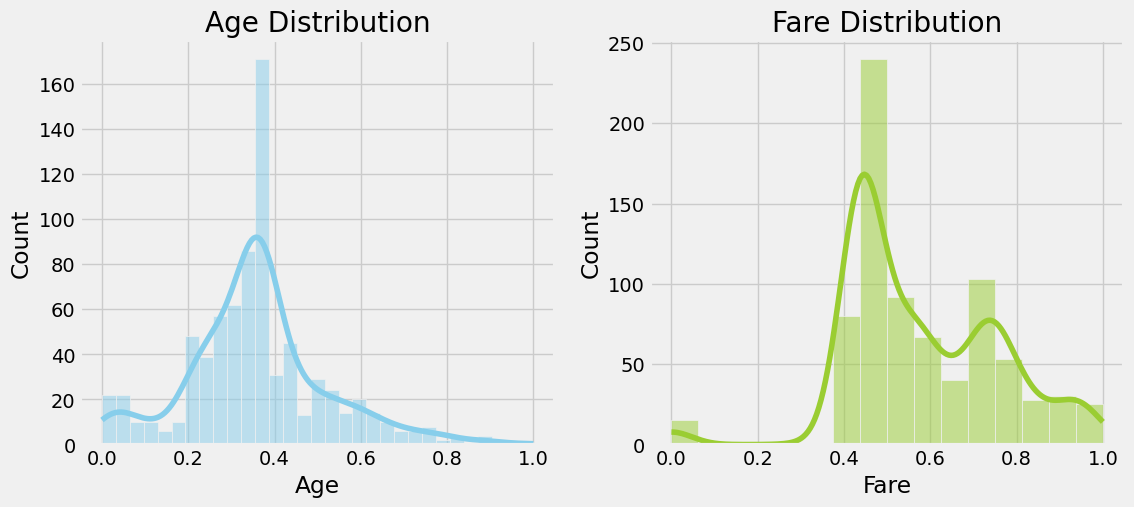

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_minmax['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_minmax['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### MaxAbsScaler

In [109]:
from sklearn.preprocessing import MaxAbsScaler

train_maxabs = train.copy()

scaler = MaxAbsScaler()
train_maxabs[['Age', 'Fare']] = scaler.fit_transform(train_maxabs[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

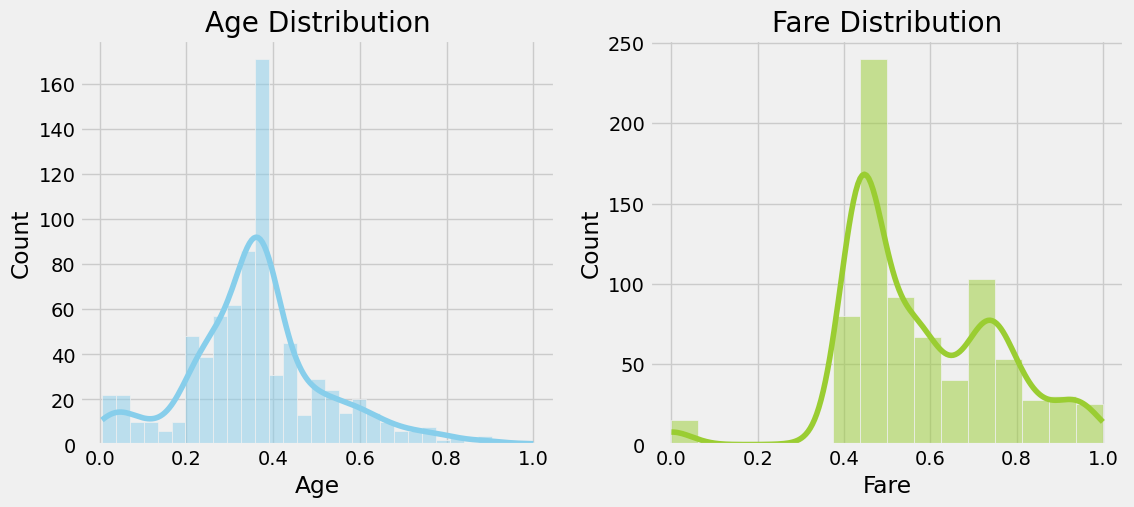

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_maxabs['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_maxabs['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### Robust Scaler

In [111]:
from sklearn.preprocessing import RobustScaler

train_robust = train.copy()

scaler = RobustScaler()
train_robust[['Age', 'Fare']] = scaler.fit_transform(train_robust[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

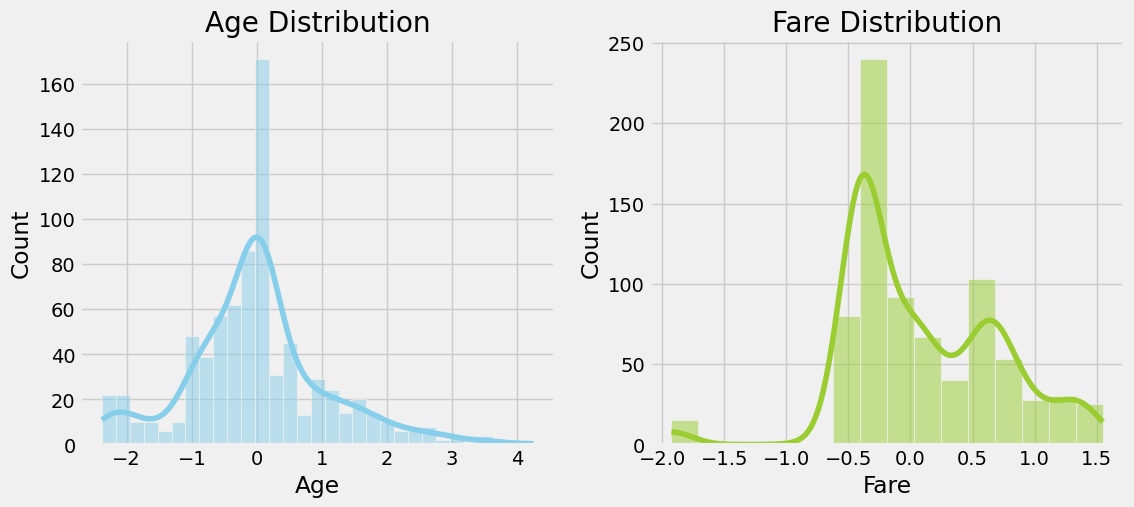

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_robust['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_robust['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

### Normalizer

In [113]:
from sklearn.preprocessing import Normalizer

train_normalized = train.copy()

scaler = Normalizer()
train_normalized[['Age', 'Fare']] = scaler.fit_transform(train_normalized[['Age', 'Fare']])

Text(0.5, 1.0, 'Fare Distribution')

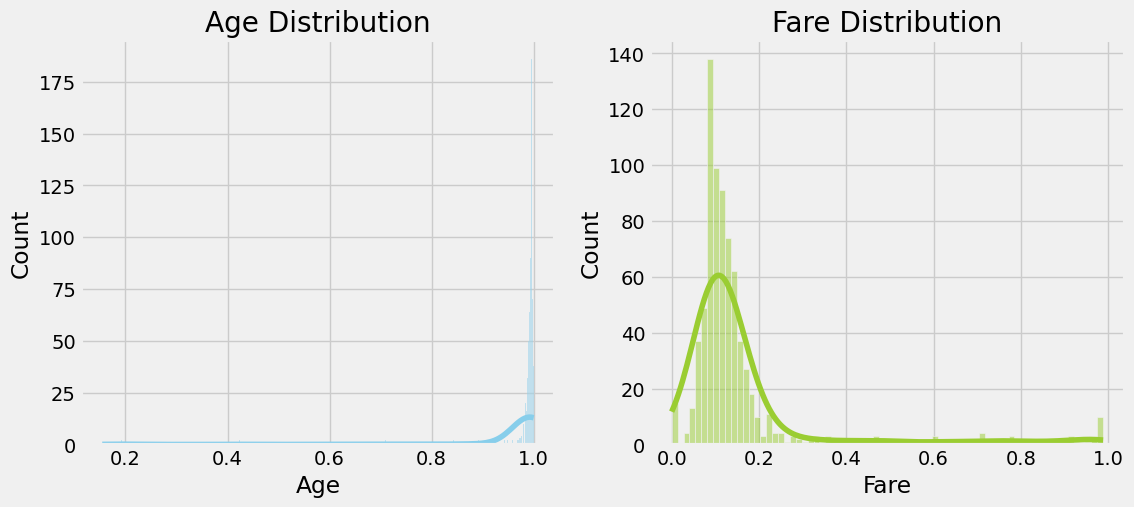

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_normalized['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(train_normalized['Fare'], kde=True, color='yellowgreen', ax=axes[1])
axes[1].set_title('Fare Distribution')

자주 사용되는 standard scaler로 진행

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])

스케일링의 경우에도 test 데이터를 fit 해서는 안됨 > train 데이터에 대해서만 fit 이후에 train 과 test set에 대해 transform
머신러닝 딥러닝 모델이 학습을 하는 과정에서 어떠한 방식으로든 test set 데이터를 사용하게 되어서는 안됩니다.

[방법]

1. train / test(valid) split 먼저 수행
2. train에 대해서 scaling 방법 학습
3. scaling한 train 데이터를 이용하여 모델 학습
4. train 데이터로 학습한 scaling 방법을 이용하여 test(valid) 데이터 scaling
5. scaling한 test(valid) 데이터를 이용하여 모델 학습

[참고](https://www.kaggle.com/code/hiejpaul/c-team-1#5.-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81(Data-Scaling))